# Pre-processing

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

### (1) neighborhood statistics data

In [2]:
df_neighbor = pd.read_csv('kwb-2019.csv', sep=';', na_values='.', decimal=",")

In [3]:
df_neighbor

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,NL00,0,Nederland,Nederland,Land,NL00,NaN,17282163,8581086,8701077,...,0.6,0.7,10.9,4154338,3367109,787228,NaN,NaN,2.0,1994.0
1,GM0003,3,Appingedam,Appingedam,Gemeente,GM0003,NaN,11721,5720,6001,...,0.9,0.9,6.4,2458,2378,80,NaN,NaN,3.0,1067.0
2,WK000300,300,Wijk 00,Appingedam,Wijk,WK000300,1.0,11720,5720,6000,...,0.9,0.9,6.4,2458,2378,80,NaN,NaN,3.0,1067.0
3,BU00030000,30000,Appingedam-Centrum,Appingedam,Buurt,BU00030000,1.0,2370,1135,1230,...,1.2,1.1,7.1,90,84,5,9901.0,1.0,3.0,1210.0
4,BU00030001,30001,Appingedam-West,Appingedam,Buurt,BU00030001,1.0,3035,1505,1530,...,1.0,1.0,4.0,163,158,5,9903.0,6.0,4.0,903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17109,WK197820,197820,Wijk20-Wijngaarden,Molenlanden,Wijk,WK197820,3.0,715,360,355,...,0.8,0.7,1.0,638,631,7,NaN,NaN,5.0,64.0
17110,BU19782001,19782001,Wijngaarden-Buitengebied,Molenlanden,Buurt,BU19782001,3.0,10,5,5,...,2.5,2.9,0.7,580,574,6,3366.0,1.0,5.0,18.0
17111,BU19782002,19782002,Kern-Dorp,Molenlanden,Buurt,BU19782002,3.0,440,225,215,...,0.5,0.2,1.0,11,11,0,3366.0,1.0,5.0,75.0
17112,BU19782003,19782003,Lintbebouwing-Oost,Molenlanden,Buurt,BU19782003,3.0,150,70,80,...,1.2,1.7,1.0,28,28,0,3366.0,1.0,5.0,36.0


In [4]:
df_neighbor.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17114 entries, 0 to 17113
Data columns (total 119 columns):
 #   Column       Dtype  
---  ------       -----  
 0   gwb_code_10  object 
 1   gwb_code_8   int64  
 2   regio        object 
 3   gm_naam      object 
 4   recs         object 
 5   gwb_code     object 
 6   ind_wbi      float64
 7   a_inw        int64  
 8   a_man        int64  
 9   a_vrouw      int64  
 10  a_00_14      int64  
 11  a_15_24      int64  
 12  a_25_44      int64  
 13  a_45_64      int64  
 14  a_65_oo      int64  
 15  a_ongeh      int64  
 16  a_gehuwd     int64  
 17  a_gesch      int64  
 18  a_verwed     int64  
 19  a_w_all      int64  
 20  a_nw_all     int64  
 21  a_marok      int64  
 22  a_antaru     int64  
 23  a_suri       int64  
 24  a_tur        int64  
 25  a_ov_nw      int64  
 26  a_geb        int64  
 27  p_geb        int64  
 28  a_ste        int64  
 29  p_ste        int64  
 30  a_hh         int64  
 31  a_1p_hh      int64  
 32  a

In [5]:
#only extract rows in "Gemeente" level
df_n = df_neighbor.loc[df_neighbor['recs'] == "Gemeente"]

In [6]:
df_n

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
1,GM0003,3,Appingedam,Appingedam,Gemeente,GM0003,NaN,11721,5720,6001,...,0.9,0.9,6.4,2458,2378,80,NaN,NaN,3.0,1067.0
9,GM0010,10,Delfzijl,Delfzijl,Gemeente,GM0010,NaN,24716,12408,12308,...,0.9,0.9,6.2,22750,13307,9443,NaN,NaN,4.0,673.0
67,GM0014,14,Groningen,Groningen,Gemeente,GM0014,NaN,231299,114937,116362,...,0.5,0.7,9.9,19796,18560,1236,NaN,NaN,1.0,3219.0
226,GM0024,24,Loppersum,Loppersum,Gemeente,GM0024,NaN,9614,4881,4733,...,1.4,1.4,2.0,11199,11104,95,NaN,NaN,5.0,213.0
254,GM0034,34,Almere,Almere,Gemeente,GM0034,NaN,207904,103082,104822,...,0.5,0.6,14.7,24877,12919,11958,NaN,NaN,2.0,1601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16617,GM1963,1963,Hoeksche Waard,Hoeksche Waard,Gemeente,GM1963,NaN,86656,42894,43762,...,0.8,0.8,4.2,32369,26893,5475,NaN,NaN,4.0,824.0
16673,GM1966,1966,Het Hogeland,Het Hogeland,Gemeente,GM1966,NaN,47888,24066,23822,...,0.8,0.9,2.9,90758,48275,42483,NaN,NaN,5.0,411.0
16767,GM1969,1969,Westerkwartier,Westerkwartier,Gemeente,GM1969,NaN,63031,31691,31340,...,1.0,0.9,3.6,36887,36269,618,NaN,NaN,5.0,471.0
16866,GM1970,1970,Noardeast-Fryslân,Noardeast-Fryslân,Gemeente,GM1970,NaN,45181,22791,22390,...,0.9,0.8,4.0,51645,37783,13862,NaN,NaN,5.0,449.0


### (2) Cancer data

In [7]:
df_cancer = pd.read_csv('cancer.csv', delimiter=';', na_values='.', decimal = ',' )

In [8]:
df_cancer

,id,GGD-regio,Groep_rij,Doodsoorzaak,CMF,Afwijking tov NL
0,1680,Aa en Hunze,Ziekten van het hartvaatstelsel,Hartvaatstelsel totaal,95,geen
1,1680,Aa en Hunze,Kanker,Kanker totaal,91,geen
2,1680,Aa en Hunze,Ziekten van de ademhalingswegen,Ademhalingswegen totaal,91,geen
3,1680,Aa en Hunze,Niet-natuurlijke doodsoorzaken,Niet-natuurlijke doodsoorzaken totaal,93,geen
4,1680,Aa en Hunze,Totaal,Sterfte alle doodsoorzaken,93,"onder, 95% zeker"
...,...,...,...,...,...,...
1905,193,Zwolle,Ziekten van het hartvaatstelsel,Hartvaatstelsel totaal,99,geen
1906,193,Zwolle,Kanker,Kanker totaal,100,geen
1907,193,Zwolle,Ziekten van de ademhalingswegen,Ademhalingswegen totaal,105,geen
1908,193,Zwolle,Niet-natuurlijke doodsoorzaken,Niet-natuurlijke doodsoorzaken totaal,111,geen


In [9]:
df_cancer.describe()

,id,CMF
count,1910.000000,1910.000000
mean,742.330366,97.812042
std,587.946734,15.158453
min,3.000000,46.000000
25%,294.000000,89.000000
50%,586.500000,97.000000
75%,935.000000,106.000000
max,1987.000000,177.000000


In [10]:
df_c = df_cancer[df_cancer['Groep_rij'] == 'Kanker']

In [11]:
df_c

,id,GGD-regio,Groep_rij,Doodsoorzaak,CMF,Afwijking tov NL
1,1680,Aa en Hunze,Kanker,Kanker totaal,91,geen
6,738,Aalburg,Kanker,Kanker totaal,114,geen
11,358,Aalsmeer,Kanker,Kanker totaal,96,geen
16,197,Aalten,Kanker,Kanker totaal,101,geen
21,59,Achtkarspelen,Kanker,Kanker totaal,121,"boven, 99% zeker"
...,...,...,...,...,...,...
1886,879,Zundert,Kanker,Kanker totaal,97,geen
1891,301,Zutphen,Kanker,Kanker totaal,103,geen
1896,1896,Zwartewaterland,Kanker,Kanker totaal,89,geen
1901,642,Zwijndrecht,Kanker,Kanker totaal,100,geen


## Merging

In [12]:
df = pd.merge(df_c, df_n, right_on='regio', left_on='GGD-regio', how='inner').drop(columns=['GGD-regio', 'id'])
df

,Groep_rij,Doodsoorzaak,CMF,Afwijking tov NL,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,Kanker,Kanker totaal,91,geen,GM1680,1680,Aa en Hunze,Aa en Hunze,Gemeente,GM1680,...,1.2,1.2,1.8,27887,27609,279,NaN,NaN,5.0,280.0
1,Kanker,Kanker totaal,96,geen,GM0358,358,Aalsmeer,Aalsmeer,Gemeente,GM0358,...,0.7,0.8,4.0,3229,2012,1217,NaN,NaN,4.0,921.0
2,Kanker,Kanker totaal,101,geen,GM0197,197,Aalten,Aalten,Gemeente,GM0197,...,0.8,0.8,4.6,9705,9654,52,NaN,NaN,4.0,782.0
3,Kanker,Kanker totaal,121,"boven, 99% zeker",GM0059,59,Achtkarspelen,Achtkarspelen,Gemeente,GM0059,...,0.8,0.7,3.5,10398,10223,175,NaN,NaN,5.0,427.0
4,Kanker,Kanker totaal,102,geen,GM0482,482,Alblasserdam,Alblasserdam,Gemeente,GM0482,...,0.4,0.5,6.0,1006,878,128,NaN,NaN,2.0,1512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,Kanker,Kanker totaal,97,geen,GM0879,879,Zundert,Zundert,Gemeente,GM0879,...,1.2,1.2,2.2,12121,12065,56,NaN,NaN,4.0,540.0
338,Kanker,Kanker totaal,103,geen,GM0301,301,Zutphen,Zutphen,Gemeente,GM0301,...,0.6,0.6,11.3,4293,4095,198,NaN,NaN,2.0,1633.0
339,Kanker,Kanker totaal,89,geen,GM1896,1896,Zwartewaterland,Zwartewaterland,Gemeente,GM1896,...,0.9,0.7,5.0,8786,8249,537,NaN,NaN,4.0,719.0
340,Kanker,Kanker totaal,100,geen,GM0642,642,Zwijndrecht,Zwijndrecht,Gemeente,GM0642,...,0.4,0.5,10.3,2277,2030,247,NaN,NaN,2.0,2060.0


# EDA

(array([ 3.,  2.,  5., 19., 37., 65., 73., 64., 49., 17.,  5.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 65.  ,  70.05,  75.1 ,  80.15,  85.2 ,  90.25,  95.3 , 100.35,
        105.4 , 110.45, 115.5 , 120.55, 125.6 , 130.65, 135.7 , 140.75,
        145.8 , 150.85, 155.9 , 160.95, 166.  ]),
 <a list of 20 Patch objects>)

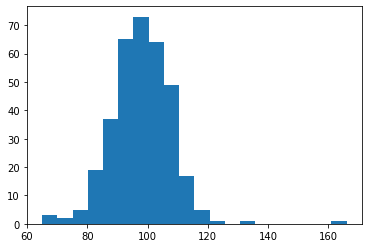

In [13]:
#histogram that shows the distribution of CMF
num_bins = 20
plt.hist(df['CMF'],num_bins)

Here, we can see that the CMF variable is right skewed



In [14]:
np.random.seed(5)
#Correlation for contionus variables
df_corr = pd.DataFrame(df.corr()['CMF'])
df_corr[df_corr['CMF'] > 0.1]
df_corr.sort_values('CMF', ascending = False)

,CMF
CMF,1.000000
p_hh_li,0.507455
p_hh_120,0.476931
p_hh_110,0.449200
p_hh_osm,0.415765
...,...
m_hh_ver,-0.491235
p_hh_hi,-0.491308
ind_wbi,NaN
pst_mvp,NaN


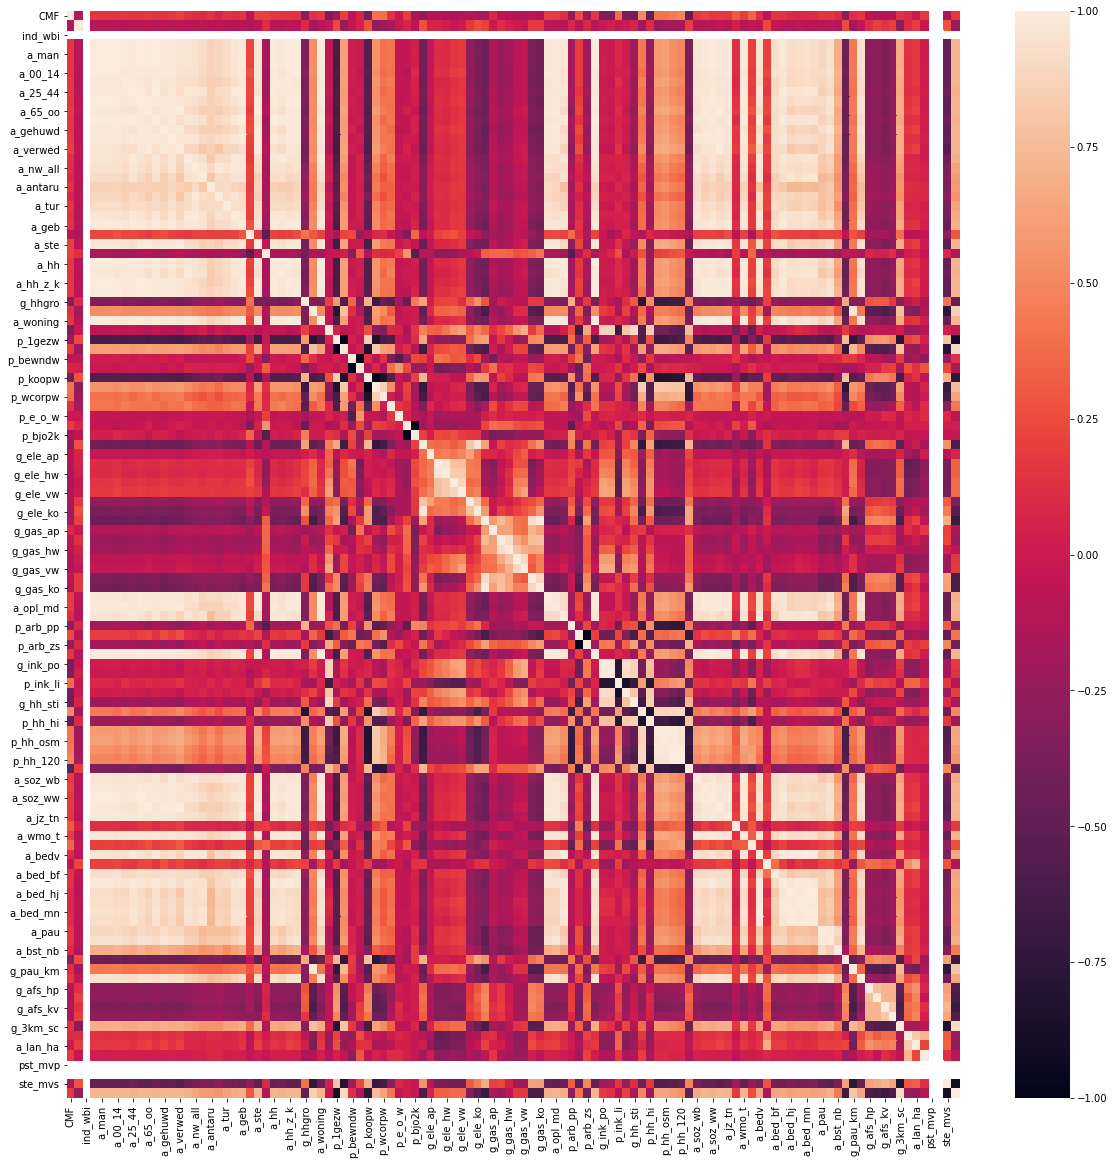

In [15]:
#Checking correlations between X variables(multicollinearity)
plt.figure(figsize=(20, 20))
df.corr()
sns.heatmap(df.corr());

#### Top 5 variables that are highly correlated with cmf

* p_hh_li 0.507455  (40% lowest income households)
* p_hh_120 0.476931  (Households up to 120% of social minimum)
* p_hh_110 0.449200   (Households up to 110% of social minimum)
* p_hh_hi  -0.491308  (20% highest income households)
* m_hh_ver -0.491235  (median wealth of households)

#### Scatter plot (along with the regression line) drawn for each Top5 features (with highest correlation) and CMF (target)

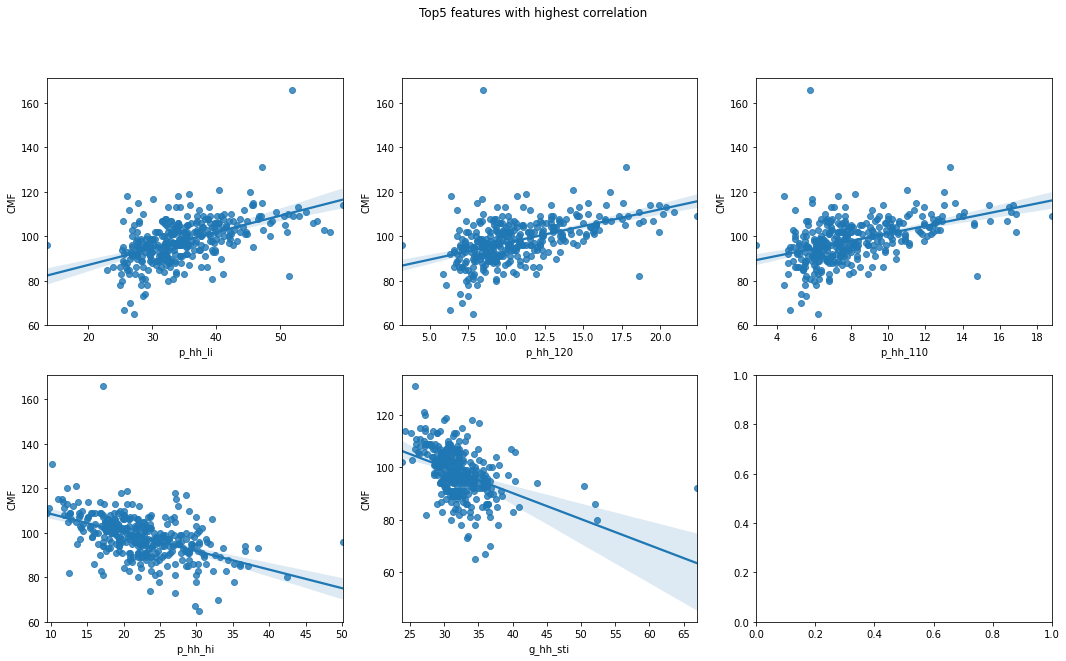

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Top5 features with highest correlation')

sns.regplot(ax=axes[0, 0], x = df['p_hh_li'], y = df['CMF'])
sns.regplot(ax=axes[0, 1], x = df['p_hh_120'], y = df['CMF'])
sns.regplot(ax=axes[0, 2], x = df['p_hh_110'], y = df['CMF'])
sns.regplot(ax=axes[1, 0], x = df['p_hh_hi'], y = df['CMF'])
sns.regplot(ax=axes[1, 1], x = df['g_hh_sti'], y = df['CMF'])

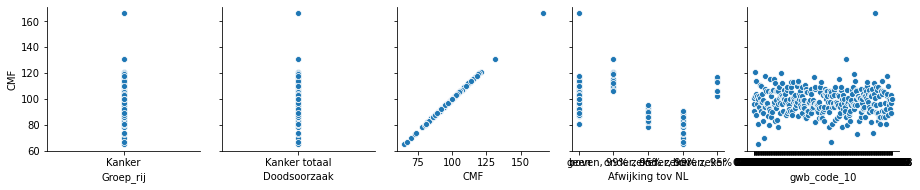

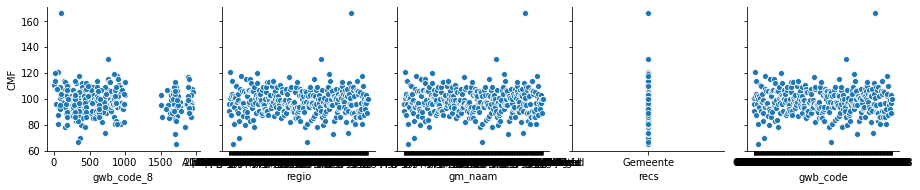

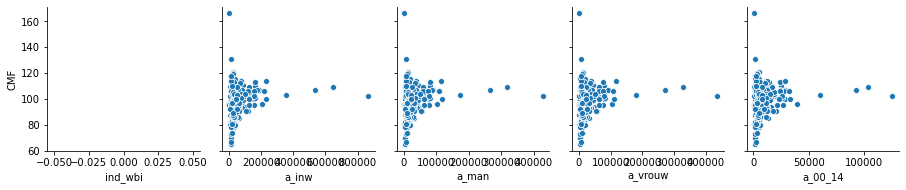

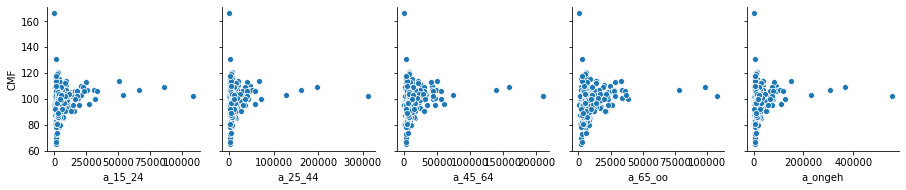

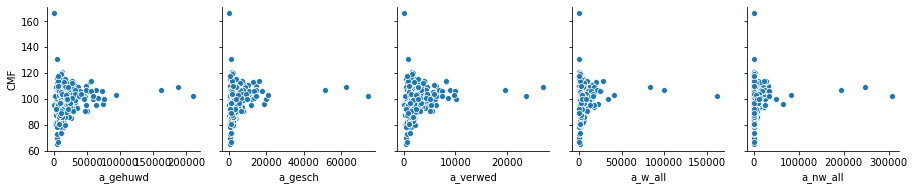

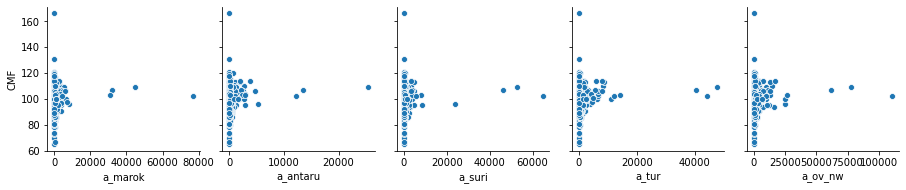

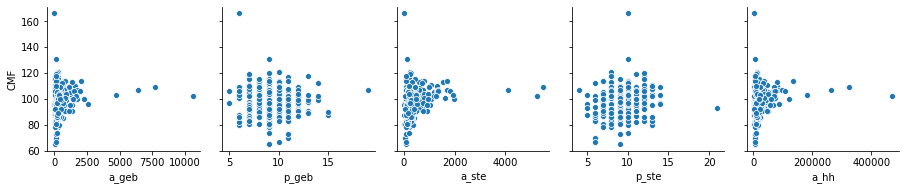

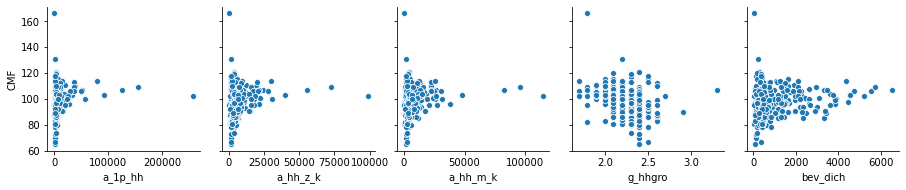

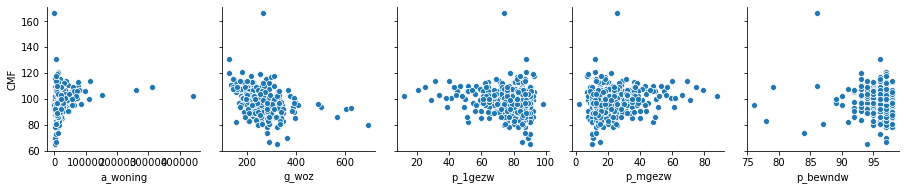

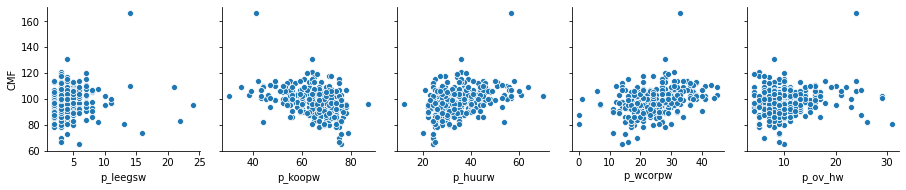

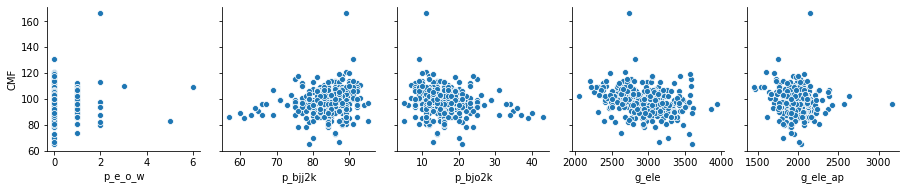

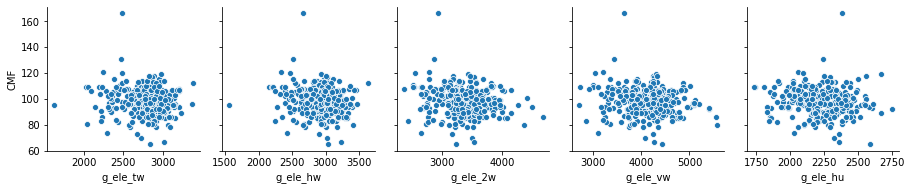

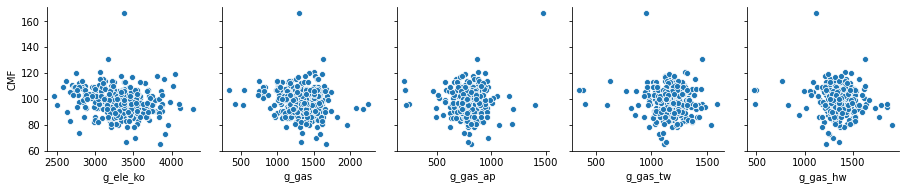

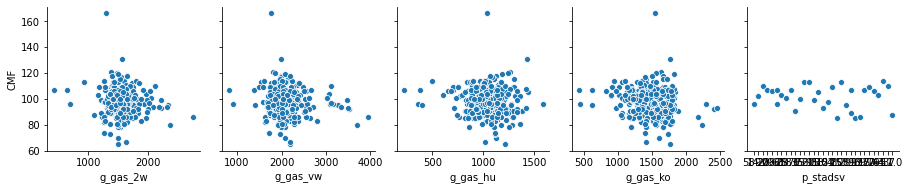

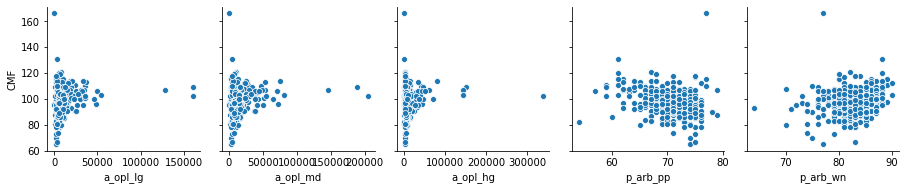

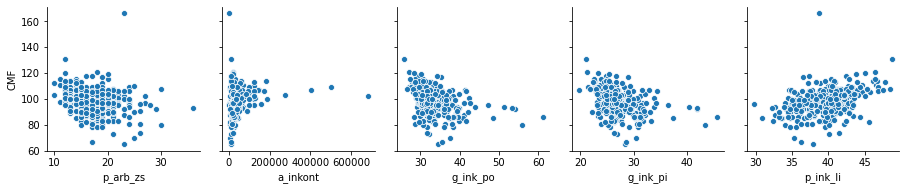

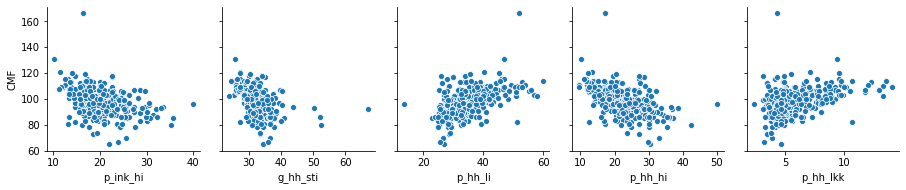

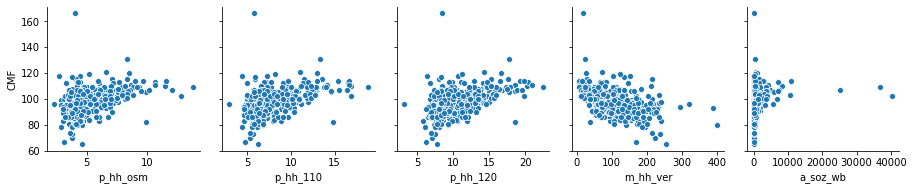

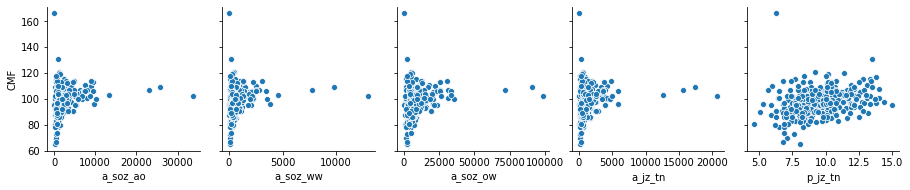

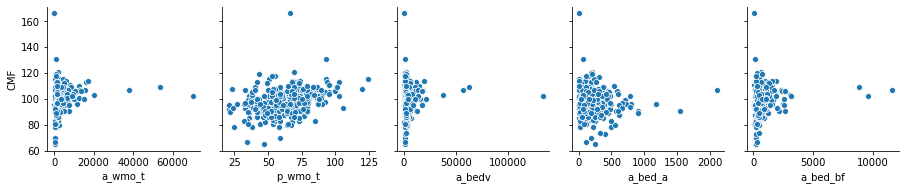

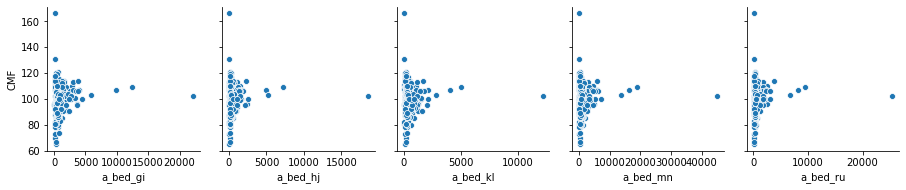

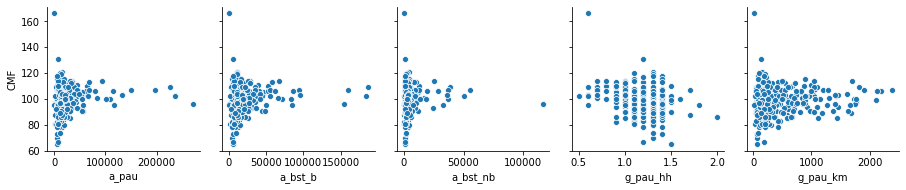

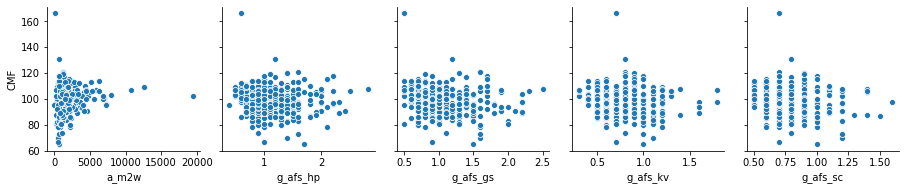

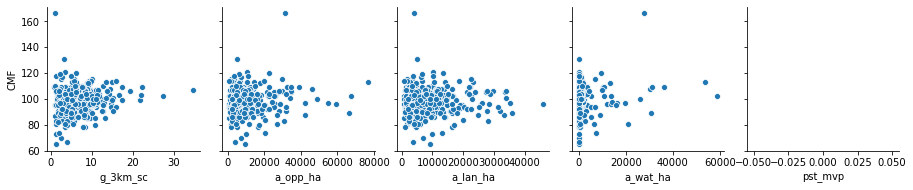

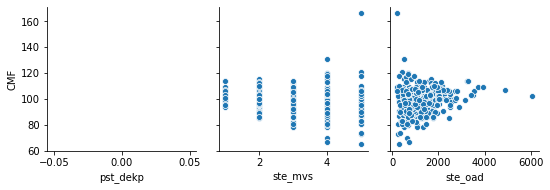

In [17]:
#overall scatter plot of all numerical variables with target (CMF)

import seaborn as sns

for i in range (0, len(df.columns),5):
    sns.pairplot(df, y_vars = ['CMF'], x_vars = df.columns[i:i+5])

## Splitting

In [18]:
x = df.drop(columns = ["gwb_code_10","gwb_code_8","regio", "gm_naam", "recs", "gwb_code","Groep_rij", "Doodsoorzaak", "CMF","Afwijking tov NL"])
y = df.CMF

In [19]:
x

,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,NaN,25386,12659,12727,3462,2610,4347,8354,6613,10096,...,1.2,1.2,1.8,27887,27609,279,NaN,NaN,5.0,280.0
1,NaN,31728,15694,16034,5722,3679,7073,9424,5830,15052,...,0.7,0.8,4.0,3229,2012,1217,NaN,NaN,4.0,921.0
2,NaN,27011,13559,13452,4294,3030,5415,8308,5964,11993,...,0.8,0.8,4.6,9705,9654,52,NaN,NaN,4.0,782.0
3,NaN,27852,14167,13685,4936,3360,6190,7908,5458,12607,...,0.8,0.7,3.5,10398,10223,175,NaN,NaN,5.0,427.0
4,NaN,20069,9853,10216,3884,2475,4535,5215,3960,8732,...,0.4,0.5,6.0,1006,878,128,NaN,NaN,2.0,1512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,NaN,21612,11043,10569,2858,2443,4660,6920,4731,9435,...,1.2,1.2,2.2,12121,12065,56,NaN,NaN,4.0,540.0
338,NaN,47609,23365,24244,7329,5520,10161,14356,10243,22068,...,0.6,0.6,11.3,4293,4095,198,NaN,NaN,2.0,1633.0
339,NaN,22503,11449,11054,4604,3115,5343,5625,3816,9766,...,0.9,0.7,5.0,8786,8249,537,NaN,NaN,4.0,719.0
340,NaN,44639,21656,22983,7269,4934,10486,11917,10033,19159,...,0.4,0.5,10.3,2277,2030,247,NaN,NaN,2.0,2060.0


In [20]:
y

0       91
1       96
2      101
3      121
4      102
      ... 
337     97
338    103
339     89
340    100
341    100
Name: CMF, Length: 342, dtype: int64

In [21]:
x.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 113 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ind_wbi   float64
 1   a_inw     int64  
 2   a_man     int64  
 3   a_vrouw   int64  
 4   a_00_14   int64  
 5   a_15_24   int64  
 6   a_25_44   int64  
 7   a_45_64   int64  
 8   a_65_oo   int64  
 9   a_ongeh   int64  
 10  a_gehuwd  int64  
 11  a_gesch   int64  
 12  a_verwed  int64  
 13  a_w_all   int64  
 14  a_nw_all  int64  
 15  a_marok   int64  
 16  a_antaru  int64  
 17  a_suri    int64  
 18  a_tur     int64  
 19  a_ov_nw   int64  
 20  a_geb     int64  
 21  p_geb     int64  
 22  a_ste     int64  
 23  p_ste     int64  
 24  a_hh      int64  
 25  a_1p_hh   int64  
 26  a_hh_z_k  int64  
 27  a_hh_m_k  int64  
 28  g_hhgro   float64
 29  bev_dich  float64
 30  a_woning  int64  
 31  g_woz     float64
 32  p_1gezw   float64
 33  p_mgezw   float64
 34  p_bewndw  float64
 35  p_leegsw  float64
 36  p_koopw   float

In [22]:
from sklearn.feature_selection import VarianceThreshold
threshold_n = 0.95 #remove col which values are same for 95%
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(x)
X = x[x.columns[sel.get_support(indices=True)]] 
sel.get_support(indices = True) #6 features removed (0, 28, 98, 104, 109, 110)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  99, 100, 101, 102, 103, 105, 106, 107,
       108, 111, 112])

In [23]:
X.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 107 columns):
 #   Column    Dtype  
---  ------    -----  
 0   a_inw     int64  
 1   a_man     int64  
 2   a_vrouw   int64  
 3   a_00_14   int64  
 4   a_15_24   int64  
 5   a_25_44   int64  
 6   a_45_64   int64  
 7   a_65_oo   int64  
 8   a_ongeh   int64  
 9   a_gehuwd  int64  
 10  a_gesch   int64  
 11  a_verwed  int64  
 12  a_w_all   int64  
 13  a_nw_all  int64  
 14  a_marok   int64  
 15  a_antaru  int64  
 16  a_suri    int64  
 17  a_tur     int64  
 18  a_ov_nw   int64  
 19  a_geb     int64  
 20  p_geb     int64  
 21  a_ste     int64  
 22  p_ste     int64  
 23  a_hh      int64  
 24  a_1p_hh   int64  
 25  a_hh_z_k  int64  
 26  a_hh_m_k  int64  
 27  bev_dich  float64
 28  a_woning  int64  
 29  g_woz     float64
 30  p_1gezw   float64
 31  p_mgezw   float64
 32  p_bewndw  float64
 33  p_leegsw  float64
 34  p_koopw   float64
 35  p_huurw   float64
 36  p_wcorpw  float

In [24]:
print(X.isnull().sum().sum())
print(X.loc[:, X.isna().any()])  #9 columns have a total of 384 missing values -> need imputation

384
     g_woz  g_gas_ap p_stadsv  g_ink_po  g_ink_pi  g_hh_sti  a_wmo_t  p_wmo_t  \
0    246.0     910.0      NaN      32.7      27.2      32.3   1605.0     63.0   
1    344.0     730.0      NaN      37.8      30.2      36.2      NaN      NaN   
2    206.0     810.0      NaN      28.9      23.7      29.7   1745.0     65.0   
3    181.0     880.0      NaN      27.2      21.3      27.1   1930.0     69.0   
4    217.0     740.0      NaN      32.2      24.9      30.7   1290.0     64.0   
..     ...       ...      ...       ...       ...       ...      ...      ...   
337  283.0     730.0      NaN      31.8      26.7      32.9   1655.0     77.0   
338  200.0     860.0      NaN      30.3      24.8      28.6      NaN      NaN   
339  210.0     780.0      NaN      30.4      23.4      31.3   1100.0     49.0   
340  197.0     860.0      NaN      32.3      25.9      30.5   3350.0     75.0   
341  232.0     780.0      NaN      32.9      26.3      29.4      NaN      NaN   

     g_pau_km  
0      

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Impute, Scale, Feature Select, and Estimate with Pipeline

In [26]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
def feature_importance(pipe, cls, num = 10, plot= False, top_list = True, sel_list= []):
    if sel_list == []:
        sel_list = pipe.named_steps['rfecv'].support_

    feature_name = X_train.columns
    feature_index = np.array(range(len(X_train.columns)))
    feature_importance = pipe.named_steps[cls].coef_

    comb = list(zip(feature_name[sel_list], feature_index[sel_list], feature_importance))
    res = sorted(comb, key = lambda x: abs(x[2]), reverse = True)
    
    if top_list == True:
        print(f"Top{num} Features with Highest Feature Importance")
        print()
        for i, j, z in res[:num]:
            print(f'(Col {j}) {i}: coef = {z}')
            
    if plot == True:
        res = res[:num]
        name, index, imp = list(zip(*res))
        
        plt.barh(range(num), imp, align = 'center')
        plt.yticks(np.arange(num), name)
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature")
        

### RFE(lr) 


In [28]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(LinearRegression(), min_features_to_select= 50, cv=5), 
                                 LinearRegression())

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.5987456286137213
-0.2762080870491186


In [29]:
feature_importance(pipe = pipe, num = 20, cls = "linearregression")

Top20 Features with Highest Feature Importance

(Col 0) a_inw: coef = 45280848319357.336
(Col 5) a_25_44: coef = -7573890582599.331
(Col 8) a_ongeh: coef = -7103195744564.885
(Col 6) a_45_64: coef = -5654412062399.258
(Col 2) a_vrouw: coef = -5383787765185.065
(Col 1) a_man: coef = -5268417847718.124
(Col 3) a_00_14: coef = -3590243945725.141
(Col 9) a_gehuwd: coef = -3267995860917.1143
(Col 7) a_65_oo: coef = -3193749872035.0576
(Col 4) a_15_24: coef = -3107337943967.0356
(Col 10) a_gesch: coef = -1042653231144.1995
(Col 11) a_verwed: coef = -409210972103.1095
(Col 93) a_pau: coef = -20813.74462890625
(Col 94) a_bst_b: coef = 15277.923828125
(Col 102) a_opp_ha: coef = 9746.93212890625
(Col 103) a_lan_ha: coef = -7262.48388671875
(Col 95) a_bst_nb: coef = 6217.71533203125
(Col 104) a_wat_ha: coef = -5794.646728515625
(Col 85) a_bedv: coef = -2654.974609375
(Col 91) a_bed_mn: coef = 881.695068359375


In [30]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(LinearRegression(), min_features_to_select= 25, cv=5), 
                                 RidgeCV(alphas = np.logspace(-6,3,10), cv = 5))

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.08681481090364274
0.09061183496196201


In [31]:
feature_importance(pipe, "ridgecv", 20)

Top20 Features with Highest Feature Importance

(Col 104) a_wat_ha: coef = 1.318161357265249
(Col 11) a_verwed: coef = 0.8799296615521374
(Col 90) a_bed_kl: coef = -0.778311561001746
(Col 103) a_lan_ha: coef = -0.6367373868374783
(Col 4) a_15_24: coef = 0.5314734680504917
(Col 91) a_bed_mn: coef = -0.4896502692696803
(Col 59) a_opl_md: coef = 0.484610770203523
(Col 7) a_65_oo: coef = 0.410840411164525
(Col 58) a_opl_lg: coef = 0.3883425114430033
(Col 89) a_bed_hj: coef = -0.38537717689331114
(Col 85) a_bedv: coef = -0.3597492058890524
(Col 102) a_opp_ha: coef = 0.30956020925475825
(Col 10) a_gesch: coef = 0.29684105728454246
(Col 95) a_bst_nb: coef = -0.2211946883881424
(Col 1) a_man: coef = 0.1956538998575765
(Col 0) a_inw: coef = 0.18301809134580843
(Col 3) a_00_14: coef = -0.18300879248654298
(Col 87) a_bed_bf: coef = -0.182607500174825
(Col 8) a_ongeh: coef = 0.17844900707490438
(Col 6) a_45_64: coef = 0.17086729805467604


In [32]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(LinearRegression(), min_features_to_select= 50, cv=5), 
                                 LassoCV(alphas = np.logspace(-6,3,10), cv = 5))

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.4265669718911437
0.2218377017851646


In [33]:
feature_importance(pipe, "lassocv", 20)

Top20 Features with Highest Feature Importance

(Col 76) m_hh_ver: coef = -6.239147944534545
(Col 48) g_ele_ko: coef = 3.52643490539469
(Col 66) g_ink_pi: coef = -2.9231629311693488
(Col 29) g_woz: coef = 2.1894308569846053
(Col 104) a_wat_ha: coef = 2.1376010493717716
(Col 4) a_15_24: coef = 1.970281296940486
(Col 22) p_ste: coef = 1.8360637344313713
(Col 9) a_gehuwd: coef = -1.765018869007264
(Col 87) a_bed_bf: coef = 1.6147169968487278
(Col 82) p_jz_tn: coef = 1.326133042081067
(Col 103) a_lan_ha: coef = -0.9315457358298896
(Col 35) p_huurw: coef = 0.7273686699146378
(Col 16) a_suri: coef = -0.6349921781467728
(Col 96) g_pau_km: coef = -0.5028084114222257
(Col 86) a_bed_a: coef = -0.32329978567402984
(Col 94) a_bst_b: coef = -0.28574828640378014
(Col 37) p_ov_hw: coef = 0.27403500001054715
(Col 106) ste_oad: coef = -0.22773776580617935
(Col 56) g_gas_ko: coef = -0.16777227452663054
(Col 41) g_ele: coef = -0.12678057656118233


### RFE(Ridge)

In [34]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(Ridge(), min_features_to_select= 50, cv=5), 
                                 LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.5812827993307907
-0.11547644513684197


In [35]:
feature_importance(pipe, "linearregression", 20)

Top20 Features with Highest Feature Importance

(Col 93) a_pau: coef = -8191.8147479055215
(Col 94) a_bst_b: coef = 6017.7873872839555
(Col 95) a_bst_nb: coef = 2446.475107895085
(Col 28) a_woning: coef = 70.55514166899067
(Col 8) a_ongeh: coef = -49.58688584657077
(Col 80) a_soz_ow: coef = -29.567955257920854
(Col 9) a_gehuwd: coef = -28.36976635559407
(Col 3) a_00_14: coef = 25.998686400098588
(Col 56) g_gas_ko: coef = -14.051109475588529
(Col 66) g_ink_pi: coef = -13.347357176065051
(Col 11) a_verwed: coef = 11.294971969316155
(Col 59) a_opl_md: coef = 10.762768671155497
(Col 81) a_jz_tn: coef = -10.691880572611478
(Col 27) bev_dich: coef = 10.383868245262054
(Col 76) m_hh_ver: coef = -9.542975440840214
(Col 4) a_15_24: coef = 9.418301673923118
(Col 106) ste_oad: coef = -9.380521103463561
(Col 48) g_ele_ko: coef = 9.231189276094819
(Col 96) g_pau_km: coef = -8.96144835844097
(Col 16) a_suri: coef = -8.603012396682022


In [36]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(),
                     StandardScaler(), 
                                 RFECV(Ridge(), min_features_to_select= 50, cv=5), 
                                 RidgeCV(alphas = np.logspace(-6,3,10), cv = 5))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.4937092174343418
0.24360269026003956


In [37]:
feature_importance(pipe, "ridgecv", 20)

Top20 Features with Highest Feature Importance

(Col 76) m_hh_ver: coef = -6.821456646313259
(Col 70) p_hh_li: coef = 4.429086581326274
(Col 48) g_ele_ko: coef = 4.04343226131291
(Col 66) g_ink_pi: coef = -3.2622910457769834
(Col 61) p_arb_pp: coef = 2.8569186855816353
(Col 87) a_bed_bf: coef = 2.4025236120736113
(Col 62) p_arb_wn: coef = -2.3299032286411263
(Col 29) g_woz: coef = 2.2119840753555597
(Col 54) g_gas_vw: coef = -2.1985405860854623
(Col 56) g_gas_ko: coef = -2.130677227821869
(Col 82) p_jz_tn: coef = 2.1016440733714377
(Col 22) p_ste: coef = 1.6311177719716679
(Col 77) a_soz_wb: coef = 1.5505250612115413
(Col 14) a_marok: coef = -1.393307180822559
(Col 20) p_geb: coef = -1.3381563086523016
(Col 86) a_bed_a: coef = -1.2176650507669224
(Col 53) g_gas_2w: coef = 1.2137429963355257
(Col 4) a_15_24: coef = 1.1934231279532679
(Col 51) g_gas_tw: coef = 1.1839769421785975
(Col 69) g_hh_sti: coef = 1.135659571191407


In [38]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(Ridge(), min_features_to_select= 50, cv=5), 
                                 LassoCV(alphas = np.logspace(-6,3,10), cv = 5))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.47644858393968625
0.2015343726576614


In [39]:
feature_importance(pipe, "lassocv", 20)

Top20 Features with Highest Feature Importance

(Col 76) m_hh_ver: coef = -7.714223623150435
(Col 48) g_ele_ko: coef = 4.4551776768800435
(Col 70) p_hh_li: coef = 4.159005743409573
(Col 66) g_ink_pi: coef = -3.0801123964246764
(Col 29) g_woz: coef = 2.784717402623728
(Col 61) p_arb_pp: coef = 2.7363983208329103
(Col 62) p_arb_wn: coef = -2.4372042039888537
(Col 54) g_gas_vw: coef = -1.9576174733467697
(Col 82) p_jz_tn: coef = 1.8682529258305127
(Col 22) p_ste: coef = 1.3060729481834836
(Col 20) p_geb: coef = -1.2281485098945626
(Col 103) a_lan_ha: coef = -1.185830034820046
(Col 47) g_ele_hu: coef = -1.0710763569557433
(Col 51) g_gas_tw: coef = 0.9325974247428804
(Col 86) a_bed_a: coef = -0.863905441373448
(Col 87) a_bed_bf: coef = 0.8344572006341873
(Col 14) a_marok: coef = -0.7802042616550667
(Col 69) g_hh_sti: coef = 0.6818368863683258
(Col 71) p_hh_hi: coef = 0.5299591797739786
(Col 53) g_gas_2w: coef = 0.49635537626681125


### RFE(Lasso)

In [40]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(Lasso(), min_features_to_select= 50, cv=5), 
                                 LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.5902087629679573
-0.21718953296358312


In [41]:
feature_importance(pipe, "linearregression", 20)

Top20 Features with Highest Feature Importance

(Col 33) p_leegsw: coef = 311974742673186.7
(Col 32) p_bewndw: coef = 311974742673185.56
(Col 23) a_hh: coef = 219548172092086.44
(Col 40) p_bjo2k: coef = -132840025664718.69
(Col 39) p_bjj2k: coef = -132840025664718.56
(Col 62) p_arb_wn: coef = -122103719615673.06
(Col 63) p_arb_zs: coef = -122103719615670.61
(Col 24) a_1p_hh: coef = -114055046555412.36
(Col 26) a_hh_m_k: coef = -59761338197446.4
(Col 25) a_hh_z_k: coef = -47820447800141.09
(Col 31) p_mgezw: coef = 39322088782025.2
(Col 30) p_1gezw: coef = 39322088782025.06
(Col 93) a_pau: coef = -7629.6865234375
(Col 94) a_bst_b: coef = 5588.578125
(Col 102) a_opp_ha: coef = 4463.53125
(Col 103) a_lan_ha: coef = -3328.18359375
(Col 104) a_wat_ha: coef = -2653.8056640625
(Col 95) a_bst_nb: coef = 2281.87890625
(Col 85) a_bedv: coef = -2267.0439453125
(Col 91) a_bed_mn: coef = 775.8955078125


In [42]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(Lasso(), min_features_to_select= 50, cv=5), 
                                 RidgeCV(alphas = np.logspace(-6,3,10), cv = 5))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.2707723709207329
0.3865432004841266


In [43]:
feature_importance(pipe, "ridgecv", 20)

Top20 Features with Highest Feature Importance

(Col 76) m_hh_ver: coef = -0.45023625434735154
(Col 70) p_hh_li: coef = 0.36758800622826676
(Col 82) p_jz_tn: coef = 0.325486522754744
(Col 71) p_hh_hi: coef = -0.31262966130882325
(Col 34) p_koopw: coef = -0.30576343986364446
(Col 36) p_wcorpw: coef = 0.30549272427897006
(Col 104) a_wat_ha: coef = 0.29992204675299505
(Col 35) p_huurw: coef = 0.2965323261456449
(Col 68) p_ink_hi: coef = -0.2959720081809089
(Col 66) g_ink_pi: coef = -0.2670469665218188
(Col 75) p_hh_120: coef = 0.26047422933623177
(Col 67) p_ink_li: coef = 0.256914767707269
(Col 65) g_ink_po: coef = -0.2469690136366981
(Col 84) p_wmo_t: coef = 0.24477375439010013
(Col 69) g_hh_sti: coef = -0.2225932913990988
(Col 22) p_ste: coef = 0.21248681465173716
(Col 74) p_hh_110: coef = 0.21098016088435737
(Col 29) g_woz: coef = -0.1958522006533533
(Col 73) p_hh_osm: coef = 0.18133263044235667
(Col 50) g_gas_ap: coef = 0.17645599887616106


In [44]:
np.random.seed(5)
pipe = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(Lasso(), min_features_to_select= 50, cv=5), 
                                 LassoCV(alphas = np.logspace(-6,3,10), cv = 5))
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.29631826993028054
0.3342479316350023


In [45]:
feature_importance(pipe, 'lassocv', 20)

Top20 Features with Highest Feature Importance

(Col 76) m_hh_ver: coef = -2.6413303201361122
(Col 70) p_hh_li: coef = 1.735834965556662
(Col 68) p_ink_hi: coef = -0.6537520444839018
(Col 104) a_wat_ha: coef = 0.43604547848640907
(Col 82) p_jz_tn: coef = 0.3502303325514906
(Col 48) g_ele_ko: coef = 0.1829793249246179
(Col 22) p_ste: coef = 0.051801837428272934
(Col 23) a_hh: coef = -0.0
(Col 24) a_1p_hh: coef = -0.0
(Col 25) a_hh_z_k: coef = -0.0
(Col 26) a_hh_m_k: coef = -0.0
(Col 27) bev_dich: coef = -0.0
(Col 28) a_woning: coef = -0.0
(Col 29) g_woz: coef = -0.0
(Col 30) p_1gezw: coef = 0.0
(Col 31) p_mgezw: coef = -0.0
(Col 32) p_bewndw: coef = -0.0
(Col 33) p_leegsw: coef = 0.0
(Col 34) p_koopw: coef = -0.0
(Col 35) p_huurw: coef = 0.0


# Best Model -> Evaluate for test set


In [46]:
np.random.seed(5)
best_model = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RFECV(Lasso(), min_features_to_select= 50, cv=5), 
                                 RidgeCV(alphas = np.logspace(-6,3,10), cv = 5))
best_model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('rfecv',
                 RFECV(cv=5, estimator=Lasso(), min_features_to_select=50)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03]),
                         cv=5))])

Training set r^2: 0.27
Test set r^2: 0.39

Training set Mean squared error: 82.32
Test set Mean squared error: 37.01

Training set Mean absolute error: 6.39
Test set Mean absolute error: 4.97


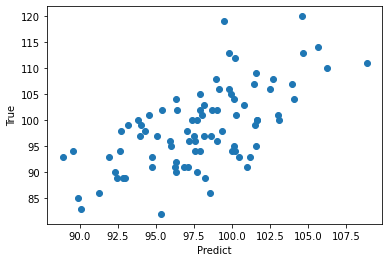

In [47]:
print("Training set r^2: {:.2f}".format(best_model.score(X_train, y_train)))
pred = best_model.predict(X_test)
plt.plot(pred, y_test, 'o')
plt.xlabel("Predict")
plt.ylabel("True")
print("Test set r^2: {:.2f}".format(best_model.score(X_test, y_test)))

print()

mse = mean_squared_error(y_train, best_model.predict(X_train))
print(f"Training set Mean squared error: {mse:.2f}")
mse = mean_squared_error(y_test, best_model.predict(X_test))
print(f"Test set Mean squared error: {mse:.2f}")

print()

mae = mean_absolute_error(y_train, best_model.predict(X_train))
print(f"Training set Mean absolute error: {mae:.2f}")
mae = mean_absolute_error(y_test, best_model.predict(X_test))
print(f"Test set Mean absolute error: {mae:.2f}")

[23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1]


Text(0.5, 0, 'Sample index')

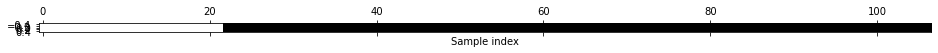

In [48]:
rfe = best_model.named_steps['rfecv']

print(rfe.ranking_)

#visualize selected features
mask = rfe.get_support()
plt.matshow(mask.reshape(1, -1), cmap = 'gray_r')
plt.xlabel("Sample index")

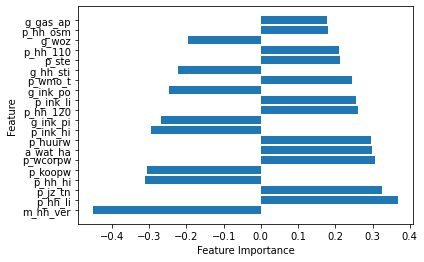

In [49]:
feature_importance(best_model, "ridgecv", num = 20, plot = True, top_list = False)

Model: Pipeline -- r^2 score: 0.387 / mean_sq_error: 37.014 / mean_abs_error: 4.967


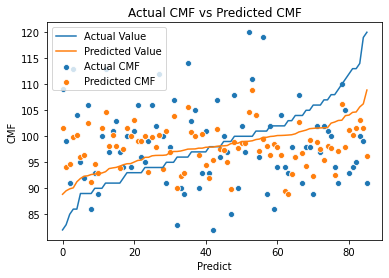

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

fig, ax = plt.subplots(1, 1)
mdl = best_model
y_pred = mdl.predict(X_test)
r2 = round(r2_score(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'Model: Pipeline -- r^2 score: {r2} / mean_sq_error: {mse} / mean_abs_error: {mae}')
n = len(y_test)

sns.scatterplot(x=np.arange(0, n), y=y_test, ax=ax, label='Actual CMF')
sns.scatterplot(x=np.arange(0, n), y=y_pred, ax=ax, label='Predicted CMF')

ax.plot(np.sort(y_test), label='Actual Value')
ax.plot(np.sort(y_pred), label='Predicted Value')

ax.legend()
ax.set_title('Actual CMF vs Predicted CMF')
ax.set_xlabel('Predict');

# Apply on Other Health Issues

In [51]:
def pre_processing(df_cancer, filter_for):
    c = df_cancer.loc[df_cancer['Groep_rij'] == filter_for]
    df = pd.merge(df_n, c, left_on='regio', right_on='GGD-regio', how='inner').drop(columns=['GGD-regio'])
    X_0 = df.drop(columns = ["gwb_code_10","gwb_code_8","regio", "gm_naam", "recs", "gwb_code","id","Groep_rij", "Doodsoorzaak", "CMF","Afwijking tov NL"])
    y = df.CMF
    
    #variance threshold
    threshold_n = 0.95 
    sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
    sel_var=sel.fit_transform(x)
    X =  X_0[ X_0.columns[sel.get_support(indices=True)]] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    return X_train, X_test, y_train, y_test

## Diseases of the cardiovascular system data

In [52]:
X_train, X_test, y_train, y_test = pre_processing(df_cancer, "Ziekten van het hartvaatstelsel")

In [53]:
X_train

,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,...,a_m2w,g_afs_hp,g_afs_gs,g_afs_kv,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,ste_mvs,ste_oad
103,63036,31308,31728,9689,6859,16302,17605,12581,29447,25391,...,2200,0.8,0.7,0.5,10.0,2565,2351,214,2.0,1931.0
8,27852,14167,13685,4936,3360,6190,7908,5458,12607,11868,...,1230,1.6,1.6,0.8,3.5,10398,10223,175,5.0,427.0
229,28991,14561,14430,4737,3295,5930,8826,6203,12624,13069,...,1345,1.2,1.2,0.6,3.1,5934,5838,96,4.0,625.0
206,32362,16302,16060,4963,3877,6951,9740,6831,14340,14107,...,1575,1.3,1.1,0.9,6.1,11836,11693,142,4.0,879.0
133,13916,6802,7114,2343,1656,2945,4119,2853,6973,5263,...,505,1.0,0.7,0.7,5.9,2578,2408,171,3.0,1281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,43311,21997,21314,6262,4851,9339,13336,9523,18904,19630,...,2225,1.5,1.2,0.8,3.2,16135,15937,198,4.0,580.0
192,54589,27141,27448,7727,5575,11632,16082,13573,21959,24048,...,2565,1.1,1.1,0.8,4.6,31776,25038,6738,4.0,871.0
117,161263,78999,82264,27238,16520,47121,42915,27469,88455,51744,...,5340,0.6,0.5,0.3,19.3,3209,2917,292,1.0,3524.0
47,57971,28917,29054,12428,7976,13728,14352,9487,26243,26562,...,2625,1.2,1.1,0.9,8.8,17666,17590,76,4.0,865.0


In [54]:
y_train

103     94
8      103
229     85
206     95
133     95
      ... 
323     93
192    105
117    108
47     106
172     96
Name: CMF, Length: 255, dtype: int64

In [55]:
np.random.seed(5)

sel_list = best_model.named_steps['rfecv'].support_

X_train_sel = X_train.loc[:,sel_list] #85 features used from the "best model"
X_test_sel = X_test.loc[:, sel_list]

#run model
pipe_h = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RidgeCV(alphas = np.logspace(-6,3,10), cv = 10))

pipe_h.fit(X_train_sel, y_train)
print(pipe_h.score(X_train_sel, y_train))
print(pipe_h.score(X_test_sel, y_test))

0.47429958920130044
0.2591173156826957


Top10 Features with Highest Feature Importance

(Col 67) p_ink_li: coef = 1.8337669014258284
(Col 22) p_ste: coef = 1.5790093866568513
(Col 66) g_ink_pi: coef = -1.5490710737626947
(Col 68) p_ink_hi: coef = -1.3759046893796876
(Col 75) p_hh_120: coef = 0.9316751409231239
(Col 53) g_gas_2w: coef = 0.9106853078398748
(Col 82) p_jz_tn: coef = 0.9045505109264818
(Col 40) p_bjo2k: coef = 0.8267378759398106
(Col 39) p_bjj2k: coef = -0.82673787593981
(Col 65) g_ink_po: coef = -0.8205486261891192


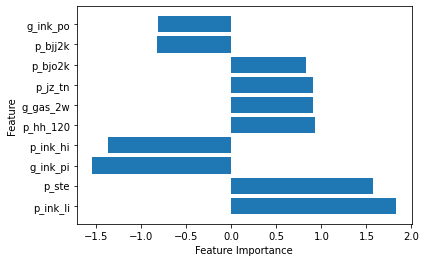

In [56]:
feature_importance(pipe_h, "ridgecv", plot = True, num = 10, top_list = True, sel_list = sel_list)

Training set r^2: 0.47
Test set r^2: 0.26

Training set Mean squared error: 88.12
Test set Mean squared error: 134.56

Training set Mean absolute error: 7.32
Test set Mean absolute error: 8.68


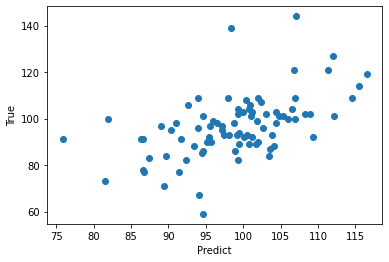

In [57]:
print("Training set r^2: {:.2f}".format(pipe_h.score(X_train_sel, y_train)))
pred = pipe_h.predict(X_test_sel)
plt.plot(pred, y_test, 'o')
plt.xlabel("Predict")
plt.ylabel("True")
print("Test set r^2: {:.2f}".format(pipe_h.score(X_test_sel, y_test)))

print()

mse = mean_squared_error(y_train, pipe_h.predict(X_train_sel))
print("Training set Mean squared error: {:.2f}".format(mse))
mse = mean_squared_error(y_test, pipe_h.predict(X_test_sel))
print("Test set Mean squared error: {:.2f}".format(mse))

print()

mae = mean_absolute_error(y_train, pipe_h.predict(X_train_sel))
print("Training set Mean absolute error: {:.2f}".format(mae))
mae = mean_absolute_error(y_test, pipe_h.predict(X_test_sel))
print("Test set Mean absolute error: {:.2f}".format(mae))

Model: Pipeline -- r^2 score: 0.259 / mean_sq_error: 134.562 / mean_abs_error: 8.681


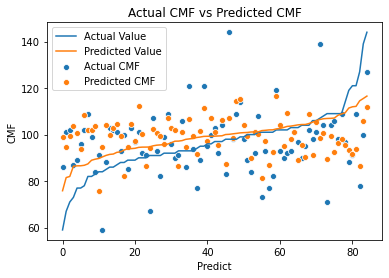

In [58]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

fig, ax = plt.subplots(1, 1)
mdl = pipe_h
y_pred = mdl.predict(X_test_sel)
r2 = round(r2_score(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'Model: Pipeline -- r^2 score: {r2} / mean_sq_error: {mse} / mean_abs_error: {mae}')
n = len(y_test)

sns.scatterplot(x=np.arange(0, n), y=y_test, ax=ax, label='Actual CMF')
sns.scatterplot(x=np.arange(0, n), y=y_pred, ax=ax, label='Predicted CMF')

ax.plot(np.sort(y_test), label='Actual Value')
ax.plot(np.sort(y_pred), label='Predicted Value')

ax.legend()
ax.set_title('Actual CMF vs Predicted CMF')
ax.set_xlabel('Predict');

## Respiratory Diseases data

In [59]:
X_train, X_test, y_train, y_test = pre_processing(df_cancer, "Ziekten van de ademhalingswegen")

In [60]:
X_train

,a_inw,a_man,a_vrouw,a_00_14,a_15_24,a_25_44,a_45_64,a_65_oo,a_ongeh,a_gehuwd,...,a_m2w,g_afs_hp,g_afs_gs,g_afs_kv,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,ste_mvs,ste_oad
278,25372,12703,12669,3548,2687,4658,8297,6182,9965,12004,...,1710,1.9,1.9,1.3,2.2,27789,27453,336,5.0,262.0
92,352866,172857,180009,60061,53781,127867,74570,36587,228270,93956,...,7980,0.6,0.6,0.4,22.1,9921,9383,538,1.0,3394.0
312,36212,18054,18158,4941,4184,5971,11933,9183,15033,16624,...,2715,1.8,1.8,1.2,2.1,28642,28350,292,5.0,378.0
234,48240,24042,24198,7400,5257,11762,13685,10136,21175,20600,...,1880,0.8,0.9,0.6,7.7,6765,6458,307,3.0,1302.0
216,10891,5574,5317,1567,1278,2180,3546,2320,4702,4969,...,695,2.0,2.2,1.8,2.1,5317,5223,95,5.0,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,47815,24257,23558,7538,5761,10265,14448,9803,21017,21110,...,3180,1.5,1.5,1.1,2.2,66220,35734,30486,5.0,431.0
192,16710,8592,8118,2520,1994,3562,4948,3686,7380,7432,...,690,1.3,1.1,0.8,6.1,7134,7017,117,4.0,953.0
117,55604,27481,28123,8044,5970,12485,16590,12515,24156,22313,...,2380,1.0,0.8,0.6,8.9,17880,4525,13355,2.0,1688.0
47,26576,13318,13258,4181,3063,5469,8568,5295,11088,12368,...,1500,1.8,1.6,1.2,2.4,14292,13389,903,5.0,277.0


In [61]:
y_train

278     96
92     122
312     95
234     91
216    131
      ... 
323     69
192     89
117    107
47     143
172     77
Name: CMF, Length: 250, dtype: int64

In [62]:
np.random.seed(5)

sel_list = best_model.named_steps['rfecv'].support_

X_train_sel = X_train.loc[:,sel_list] #85 features used from the "best model"
X_test_sel = X_test.loc[:, sel_list]

#run model
pipe_r = make_pipeline(SimpleImputer(), 
                                 StandardScaler(), 
                                 RidgeCV(alphas = np.logspace(-6,3,10), cv = 10))

pipe_r.fit(X_train_sel, y_train)
print(pipe_r.score(X_train_sel, y_train))
print(pipe_r.score(X_test_sel, y_test))

0.41842524879642906
0.3781628232489931


Top10 Features with Highest Feature Importance

(Col 22) p_ste: coef = 2.4766489812725783
(Col 48) g_ele_ko: coef = 2.1344560842005618
(Col 103) a_lan_ha: coef = -1.8472053771299461
(Col 68) p_ink_hi: coef = -1.6449983117162854
(Col 46) g_ele_vw: coef = 1.4997758230275364
(Col 41) g_ele: coef = 1.3760804764152623
(Col 102) a_opp_ha: coef = -1.341866275545168
(Col 69) g_hh_sti: coef = -1.312597242142205
(Col 100) g_afs_kv: coef = 1.3093234329310819
(Col 75) p_hh_120: coef = 1.2950431890848693


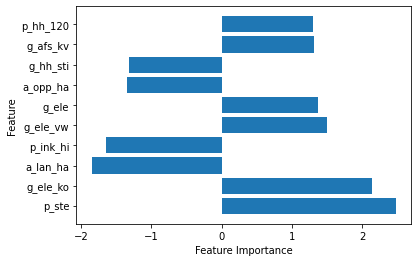

In [63]:
feature_importance(pipe_r, "ridgecv", plot = True, num = 10, top_list = True, sel_list = sel_list)

Training set r^2: 0.42
Test set r^2: 0.38

Training set Mean squared error: 220.75
Test set Mean squared error: 318.92

Training set Mean absolute error: 11.82
Test set Mean absolute error: 13.62


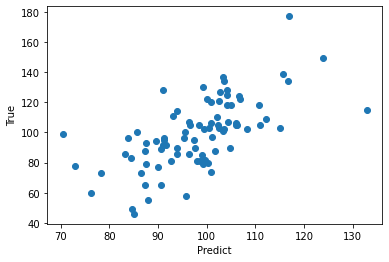

In [64]:
print("Training set r^2: {:.2f}".format(pipe_r.score(X_train_sel, y_train)))
pred = pipe_r.predict(X_test_sel)
plt.plot(pred, y_test, 'o')
plt.xlabel("Predict")
plt.ylabel("True")
print("Test set r^2: {:.2f}".format(pipe_r.score(X_test_sel, y_test)))

print()

mse = mean_squared_error(y_train, pipe_r.predict(X_train_sel))
print("Training set Mean squared error: {:.2f}".format(mse))
mse = mean_squared_error(y_test, pipe_r.predict(X_test_sel))
print("Test set Mean squared error: {:.2f}".format(mse))

print()

mae = mean_absolute_error(y_train, pipe_r.predict(X_train_sel))
print("Training set Mean absolute error: {:.2f}".format(mae))
mae = mean_absolute_error(y_test, pipe_r.predict(X_test_sel))
print("Test set Mean absolute error: {:.2f}".format(mae))

Model: Pipeline -- r^2 score: 0.378 / mean_sq_error: 318.919 / mean_abs_error: 13.618


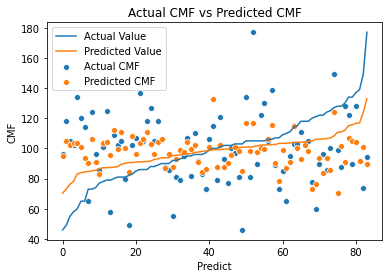

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

fig, ax = plt.subplots(1, 1)
mdl = pipe_r
y_pred = mdl.predict(X_test_sel)
r2 = round(r2_score(y_test, y_pred), 3)
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f'Model: Pipeline -- r^2 score: {r2} / mean_sq_error: {mse} / mean_abs_error: {mae}')
n = len(y_test)

sns.scatterplot(x=np.arange(0, n), y=y_test, ax=ax, label='Actual CMF')
sns.scatterplot(x=np.arange(0, n), y=y_pred, ax=ax, label='Predicted CMF')

ax.plot(np.sort(y_test), label='Actual Value')
ax.plot(np.sort(y_pred), label='Predicted Value')

ax.legend()
ax.set_title('Actual CMF vs Predicted CMF')
ax.set_xlabel('Predict');